In [ ]:
!pip install transformers
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.16.0
    Uninstalling torchtext-0.16.0:
      Successfully uninstalled torchtext-0.16.0


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [ ]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # Progress Bar
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import warnings
from transformers import logging as hf_logging
hf_logging.set_verbosity_error() # Hidding Huggingface Warnings
warnings.filterwarnings("ignore")

In [ ]:
# load packages
import torch
import torch.nn as nn
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from transformers import get_linear_schedule_with_warmup, AdamW
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
import time, datetime, random, re
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from torch.cuda.amp import autocast, GradScaler

SEED = 15
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

MODEL_NAME = 'xlm-roberta-large'

In [ ]:
torch.backends.cudnn.deterministic = True
torch.cuda.amp.autocast(enabled=True)

In [ ]:
device = torch.device("cuda")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/updatedcyberbulling-bangla-dataset-same-as-bangla-online-comments-dataset.xlsx')
raw_data = df.copy()
raw_data.head()

,comment,Category,Gender,comment react number,label,binary label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,Politician,male,1.0,religious,1
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,0
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,0
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,Politician,Male,1.0,not bully,0
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,Politician,Male,3.0,troll,1


In [ ]:
#Dropping unnecessary columns
df = raw_data.drop(['Category','Gender','comment react number','binary label'], axis=1)
display(df)

,comment,label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll
...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully


In [ ]:
# Rename the column
df.rename(columns={'comment': 'Text'}, inplace=True)

In [ ]:
# Rename the column
df.rename(columns={'label': 'Result'}, inplace=True)

In [ ]:
df.head()

,Text,Result
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(20)

,Text,Result
14322,আবালের মত কথা বলিস না।।,troll
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,threat
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",religious
39917,নুনুবেলের তামাসা,sexual
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",not bully
1676,একেই বলে ঠেলার নাম বাবাজি,troll
3509,মায়াবী হাসি❤❤❤,not bully
6496,স্যার Do something for Rongpur.,not bully
9471,হিরু আলম এই দেশে একজন ইস্টার। তারছবির গান গুলো...,not bully
32699,"খাংকি মাগী তুই কোন মুখে বিচারের কথা বলস,,,,তুই...",sexual


In [ ]:
def sentiment2label(sentiment):
    if sentiment == "not bully":
        return 0
    else :
        return 1

df['Result'] = df['Result'].apply(sentiment2label)

In [ ]:
df.head()

,Text,Result
14322,আবালের মত কথা বলিস না।।,1
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,1
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",1
39917,নুনুবেলের তামাসা,1
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",0


In [ ]:
df_new=pd.read_csv('/content/drive/MyDrive/translation.csv')
df_new

,Text,Result
0,ড্রেকের মন ঠিক করতে হবে যে সে র্যাপার না কুত্তা?,1
1,রেডমন্ড গ্রিন কুত্তার বাচ্চা,1
2,এক দিন আগে এটা ফেলে দিন নিগ্রোদের এটা শোনা দর...,1
3,নির্বোধ গর্দভ গর্দভ,1
4,ঈগল হচ্ছে যৌনসঙ্গম বিড়াল।,1
...,...,...
9995,যদি তুই কুত্তার বাচ্চা হয়ে যাস......তাহলে আম...,1
9996,বোবা কুত্তা,1
9997,আমার হোপ পর্ব শেষ,1
9998,যে তোমাকে পছন্দ করে না তার কাছে তুমি সবসময় ক...,1


In [ ]:
# Define a function to categorize cyberbullying result into two groups
df_new.loc[:,'Result']  = df_new['Result'].apply(lambda x: 1 if x != 2 else 0)
df_new.head(-10)

,Text,Result
0,ড্রেকের মন ঠিক করতে হবে যে সে র্যাপার না কুত্তা?,1
1,রেডমন্ড গ্রিন কুত্তার বাচ্চা,1
2,এক দিন আগে এটা ফেলে দিন নিগ্রোদের এটা শোনা দর...,1
3,নির্বোধ গর্দভ গর্দভ,1
4,ঈগল হচ্ছে যৌনসঙ্গম বিড়াল।,1
...,...,...
9985,"এভাবেই তুমি পুসি খাও,আমার পরে আবার করো।",1
9986,এই সব মেয়েরা বলছে যে কেউ তাদের সহ্য করতে পার...,1
9987,; এই কুত্তার মাংস বিক্রি চিকেন উইংস এবং ফ্রাই,1
9988,; পরবর্তী যে ব্যক্তিকে আমি দেখতে পাচ্ছি যে সে...,1


In [ ]:
df2 = pd.concat([df, df_new], axis=0)
df2

,Text,Result
14322,আবালের মত কথা বলিস না।।,1
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,1
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",1
39917,নুনুবেলের তামাসা,1
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",0
...,...,...
9995,যদি তুই কুত্তার বাচ্চা হয়ে যাস......তাহলে আম...,1
9996,বোবা কুত্তা,1
9997,আমার হোপ পর্ব শেষ,1
9998,যে তোমাকে পছন্দ করে না তার কাছে তুমি সবসময় ক...,1


In [ ]:
df = None
df = df2
df

,Text,Result
14322,আবালের মত কথা বলিস না।।,1
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,1
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",1
39917,নুনুবেলের তামাসা,1
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",0
...,...,...
9995,যদি তুই কুত্তার বাচ্চা হয়ে যাস......তাহলে আম...,1
9996,বোবা কুত্তা,1
9997,আমার হোপ পর্ব শেষ,1
9998,যে তোমাকে পছন্দ করে না তার কাছে তুমি সবসময় ক...,1


In [ ]:
df['Result'].value_counts()

1    36987
0    17014
Name: Result, dtype: int64

In [ ]:
#Dropping null values
df.dropna(inplace=True)
df.shape

(54001, 2)

In [ ]:
# Function to remove symbols using string operations
def remove_symbols(text):
    # Define a string containing symbols to remove
    symbols = '''!"[\\]^_`{|}~→'''
    return ''.join(char for char in text if char not in symbols)

# Apply the function to the 'text' column
df['Text'] = df['Text'].apply(remove_symbols)

In [ ]:
df.head()

,Text,Result
14322,আবালের মত কথা বলিস না।।,1
4365,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,1
6927,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",1
39917,নুনুবেলের তামাসা,1
12495,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",0


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate the comments and labels
X = df['Text']
y = df['Result']

# Instantiate and apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y) #values.reshape helps to keep the values to a separate column. not to interfere

# Create a new DataFrame with the oversampled data
balanced_data = pd.DataFrame({'Text': X_resampled.flatten(), 'Result': y_resampled})

In [ ]:
balanced_data

,Text,Result
0,আবালের মত কথা বলিস না।।,1
1,জাহেদ খান বলে যে ওই খানকির পোলা রে দেখলেই জুতা...,1
2,"সেফুদা একজন নাস্তিক,মানুষ রুপি জানুয়ার",1
3,নুনুবেলের তামাসা,1
4,"ছ্যাঁক খেয়ে বিষ খাইছিলাম, পোষ্ট দেখার পর বমি ক...",0
...,...,...
73969,ওদের pics পোস্ট করার আগে permisson নিসিলেন ?,0
73970,ভোটের রেজাল্ট পাইয়্যা গেছি,0
73971,আপু এক কথায় অসাধারণ,0
73972,"তুমি নামাজ পড় না, আল্লাহর নিকট কান্না কাটি করে...",0


In [ ]:
df = balanced_data

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['Text'], df['Result'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['Result'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [ ]:
x_train = train_text
y_train = train_labels
x_val = val_text
y_val = val_labels
x_test = test_text
y_test = test_labels

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')

In [ ]:
max_val = 0
for sent in (x_train.tolist() + x_train.tolist() + x_val.tolist()):
    try:
        sent_tok_len = len(tokenizer.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass

print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 588


In [ ]:
MAX_LENGTH = 210

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME,
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH,
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence,
                                       add_special_tokens=True,
                                       max_length=MAX_LENGTH,
                                       pad_to_max_length=True,
                                       return_attention_mask=True,
                                       return_token_type_ids=True,
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])

    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train = tokenize(x_train, tokenizer)
X_test = tokenize(x_test, tokenizer)
X_val = tokenize(x_val, tokenizer)

100%|██████████| 11096/11096 [00:02<00:00, 4073.62it/s]


In [ ]:
from transformers import TFXLMRobertaModel

In [ ]:
roberta = TFXLMRobertaModel.from_pretrained("jplu/tf-xlm-roberta-large")
SEQ_LEN = 210
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = roberta(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.LSTM(128)(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(768)(X)
X = tf.keras.layers.Activation("relu")(X)
X = tf.keras.layers.Dense(768)(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(2, activation='sigmoid', name='outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
model.layers[2].trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 210)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 210)]                0         []                            
 )                                                                                                
                                                                                                  
 tfxlm_roberta_model (TFXLM  TFBaseModelOutputWithPooli   5598904   ['input_ids[0][0]',           
 RobertaModel)               ngAndCrossAttentions(last_   32         'attention_mask[0][0]']      
                             hidden_state=(None, 210, 1                                       

In [ ]:
### Create an output directory
output_dir = '/content/drive/MyDrive/'

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs = 4,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/4
1619/1619 [==============================] - 3099s 2s/step - loss: 0.5159 - accuracy: 0.7465 - val_loss: 0.6339 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 2/4
1619/1619 [==============================] - 3081s 2s/step - loss: 0.4361 - accuracy: 0.7916 - val_loss: 0.3819 - val_accuracy: 0.8218 - lr: 0.0010
Epoch 3/4
1619/1619 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.8139
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1619/1619 [==============================] - 3085s 2s/step - loss: 0.3981 - accuracy: 0.8139 - val_loss: 0.5089 - val_accuracy: 0.7977 - lr: 0.0010
Epoch 4/4
1619/1619 [==============================] - 3057s 2s/step - loss: 0.3669 - accuracy: 0.8295 - val_loss: 0.3294 - val_accuracy: 0.8516 - lr: 1.0000e-04


Lowest Validation Loss: epoch 4
Highest Validation Accuracy: epoch 4


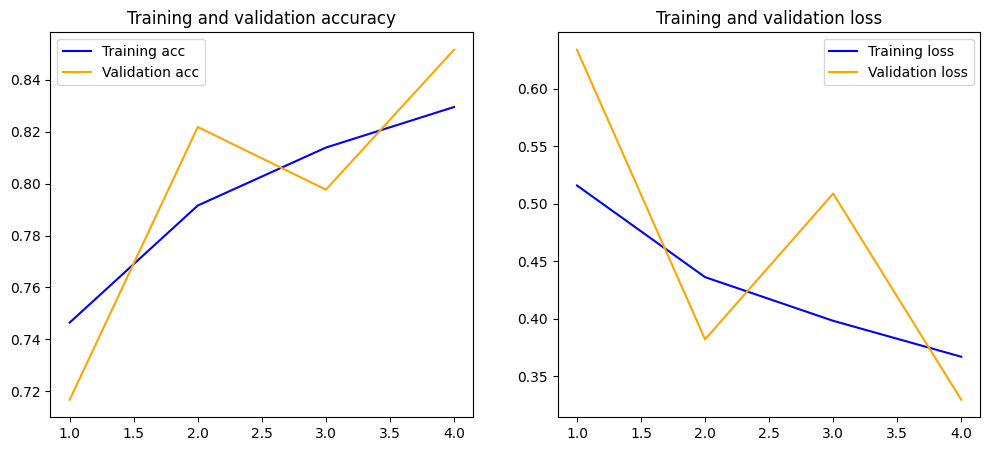

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'orange', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

plot_history(history)

In [ ]:
def get_min_val_loss_epoch(history):
    return "0"+str(np.argmin(history.history['val_loss'])+1)

def get_max_val_acc_epoch(history):
    return "0"+str(np.argmax(history.history['val_accuracy'])+1)

In [ ]:
epoch_num = get_max_val_acc_epoch(history)
model.load_weights(output_dir+"/weights."+epoch_num+".hdf5") # Load in model weights

In [ ]:
y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

347/347 [==============================] - 492s 1s/step


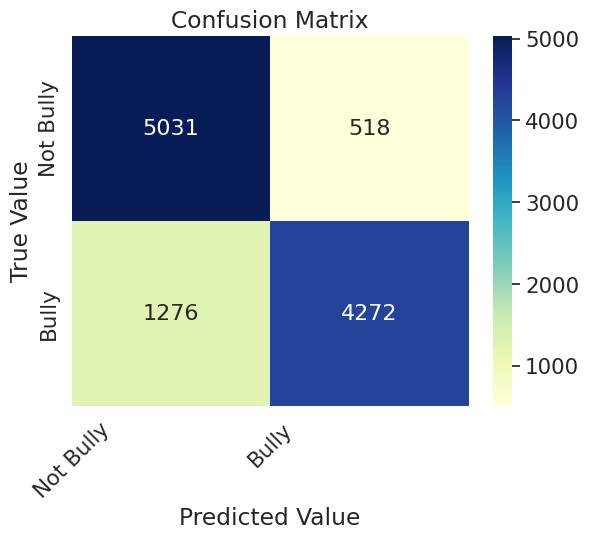

In [ ]:
labels_5 = ['Not Bully','Bully']

def print_cf1(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat)
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame(cm, index=labels_5,columns=[0,1]),
                annot = True,
                annot_kws = {"size":16},
                fmt="d",
                cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.xticks([0,1], labels_5, rotation=45)
    plt.ylabel("True Value")
    plt.show()

print_cf1(y_test, y_hat)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_hat))

Accuracy: 0.8383346850500135


In [ ]:
print(classification_report(y_test, y_hat, target_names=labels_5))

              precision    recall  f1-score   support

   Not Bully       0.80      0.91      0.85      5549
       Bully       0.89      0.77      0.83      5548

    accuracy                           0.84     11097
   macro avg       0.84      0.84      0.84     11097
weighted avg       0.84      0.84      0.84     11097

              precision    recall  f1-score   support

   Not Bully       0.80      0.91      0.85      5549
       Bully       0.89      0.77      0.83      5548

    accuracy                           0.84     11097
   macro avg       0.84      0.84      0.84     11097
weighted avg       0.84      0.84      0.84     11097

